In [6]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

In [7]:
df = pd.read_csv("C:\\Users\\Prathmesh Aphale\\Downloads\\Tesla.csv - Tesla.csv.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [10]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


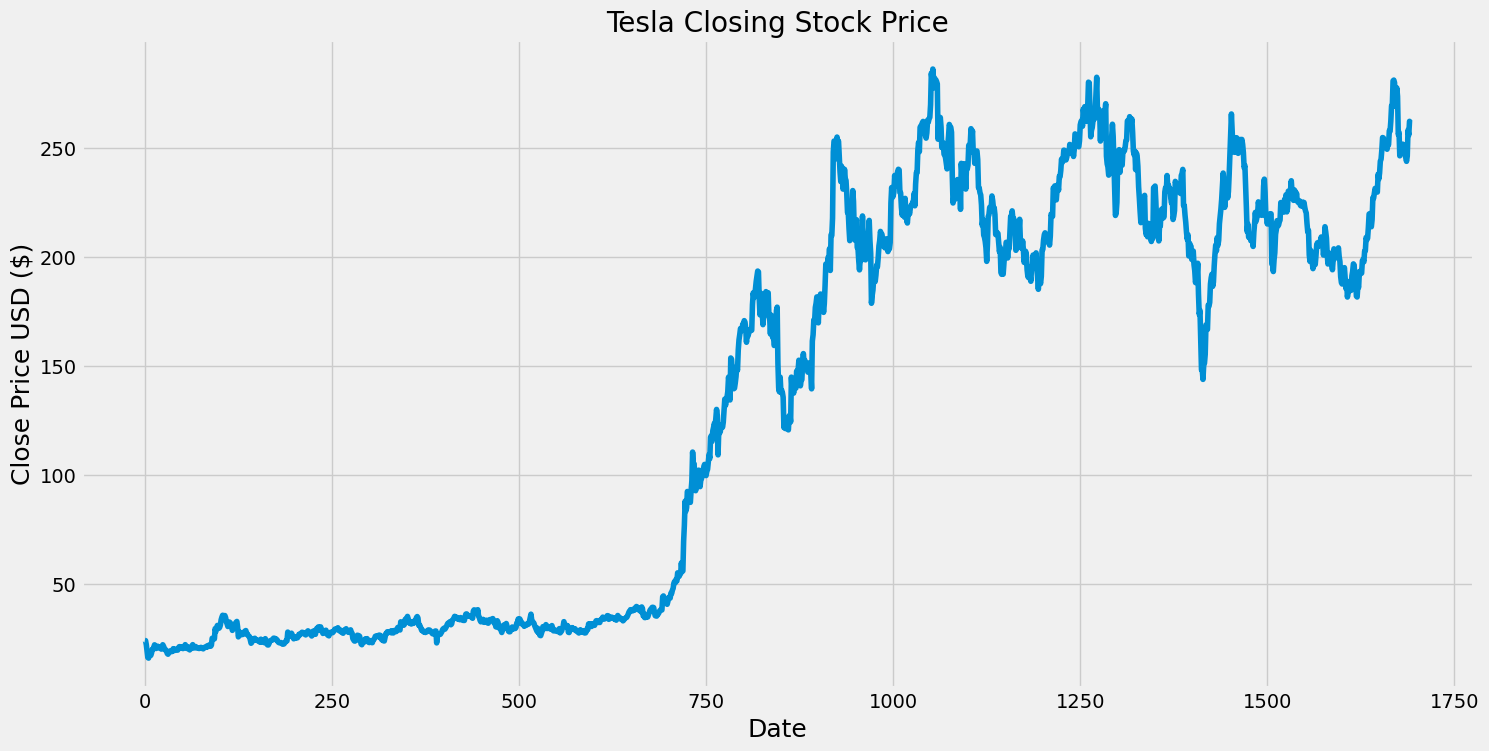

In [13]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Tesla Closing Stock Price")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

The Tesla closing price chart shows a long period of steady movement followed by a strong upward rise and several sharp swings over time. This pattern highlights how the stock shifted from slow growth to rapid expansion, with noticeable peaks and drops along the way. The clear trend and visible volatility make it a good candidate for time series forecasting with tools like Prophet, since the data shows both long term growth and regular fluctuations.

In [14]:
df1 = df[["Date","Close"]] 
df1 = df1.rename(columns = {"Date":"ds","Close":"y"})
df1.head()

,ds,y
0,6/29/2010,23.889999
1,6/30/2010,23.830000
2,7/1/2010,21.959999
3,7/2/2010,19.200001
4,7/6/2010,16.110001


In [15]:
m = Prophet(daily_seasonality=True)
m.fit(df1)

12:27:03 - cmdstanpy - INFO - Chain [1] start processing
12:27:04 - cmdstanpy - INFO - Chain [1] done processing


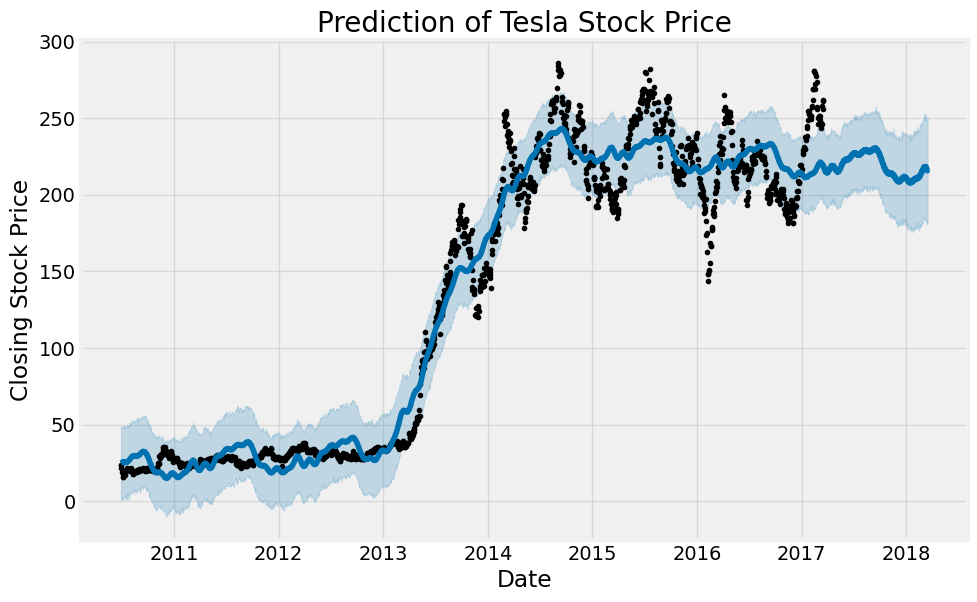

In [16]:
future = m.make_future_dataframe(periods=365)
predictions=m.predict(future)
m.plot(predictions)
plt.title("Prediction of Tesla Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

This forecast plot shows how the Prophet model follows the overall movement of Tesla’s stock and then projects the trend forward with a clear confidence range. The model captures the strong rise and the later swings quite well, keeping its predictions close to the real values. The shaded area gives a sense of uncertainty, but the forecast still stays steady and realistic. This makes the output useful for understanding the general direction of the stock rather than exact day to day changes.

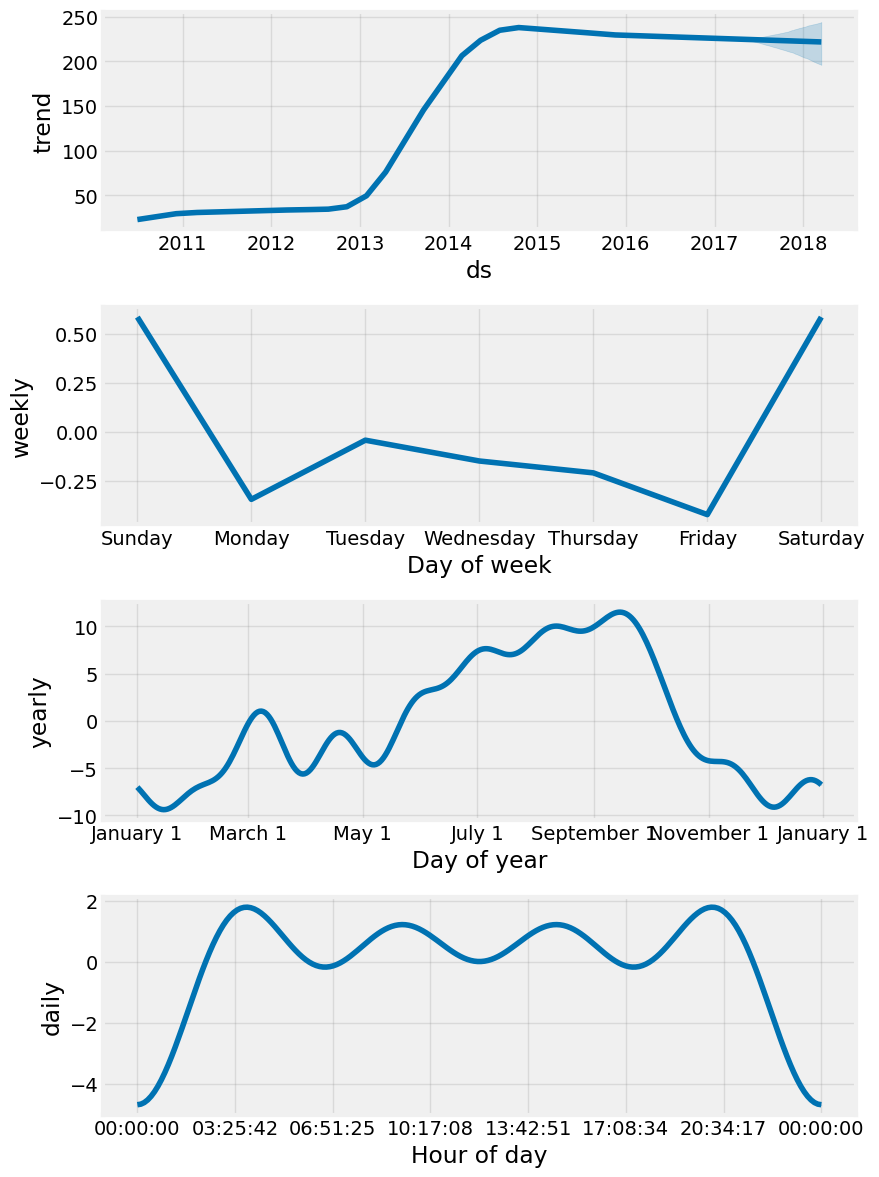

In [17]:
m.plot_components(predictions)
plt.show()

The seasonal plots show how the Prophet model expects Tesla’s stock to behave based on the patterns it learned from the data. The trend line highlights the model’s prediction of long term growth, followed by a period of slower movement. The weekly curve shows which days the model expects slightly stronger or weaker performance. The yearly pattern reflects the model’s belief that certain months tend to be more active than others. The daily curve represents the intraday rhythm the model predicts. Together, these predicted components give a clearer picture of how the model thinks the stock will move over different time scales.

This project gave a full look at Tesla’s stock movement by combining time series analysis with Prophet’s forecasting ability. The model captured the long term trend, the sudden jumps in price, and the repeating weekly and yearly patterns with steady accuracy. The forecast stayed close to the real data and offered a smooth and reliable view of how the stock could behave in the future. The seasonal breakdown added even more insight into the rhythmic changes the model detected. Overall, the project worked well from start to finish, and the model delivered strong results, making this a successful and meaningful stock prediction analysis.